# Graph Structures and Algorithms

## Necessary modules

In [34]:
import itertools
from pprint import pprint
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import random
import numpy as np

from sklearn import cluster

import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from community import community_louvain
from networkx.algorithms.components import weakly_connected_components,\
strongly_connected_components

## Community detection
1. Agglomerative method
2. Divisive mwethod

### Girvan-Newman (divisive method) tutorial
1. Return tuples of sets of nodes
2. Each set of node is a community
3. Each tuple is a sequence of communities at a particular level of the algorithm.


#### Get total number of communities

In [2]:
G = nx.karate_club_graph()
communities = girvan_newman(G) 

In [3]:
for community in communities: 
    print(community)

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25

**Note: `girvan_newman` object will be empty once fully iterated** <br>
1. iterable through the generator object and save to a list to use it in multiple lines
2. or define the generator object again

iterable is fully iterated 

In [4]:
print(len([community for community in communities]))

0


define the generator object again

In [5]:
communities = girvan_newman(G) 
print(len([community for community in communities]))

33


#### Get the communities in the first tuple

In [6]:
comp = girvan_newman(G)
tuple(c for c in next(comp))

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

**Note: be aware when apply `next()`**
1. it depends the current iteration level
2. also will change the iteration after applying the function

In [7]:
# make sure you know the iteration stage  of your iterable
# communities is fully iterated in last block 
# so reset the iterable by `communities = girvan_newman(G)`
communities = girvan_newman(G) 

# print out all sets of nodes in the first tuple 
print("First tuple")
for community in next(communities): 
    print(community)
    
# `communities` is iterated by one position, 
# the next time it is called will read 2nd tuple
# print out all sets of nodes in the first tuple    
print("\nSecond tuple")    
for community in next(communities): 
    print(community)

First tuple
{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}
{2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}

Second tuple
{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}
{32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}
{9}


#### Get only the first k tuples

In [8]:
k = 3
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(c for c in communities), '\n') 

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}) 

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9}) 

({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9}) 



### Girvan-Newman on karate_club_graph
This example only plot two colors based of number of sets of nodes (communities) in the first tuple 

total nodes in first tuple: 34
total nodes in G: 34
node colors
[(0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.5266666666666667, 0.7400000000000001),
 (0.31333333333333335, 0.526666666666666

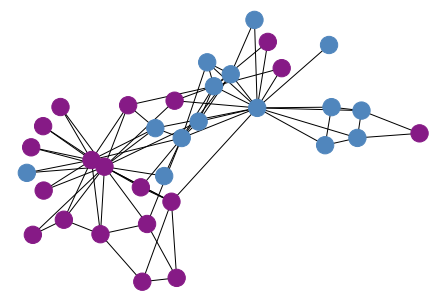

In [9]:
# get color of each community - tuples of rgb 
# one community one color 
def get_color(i, r_off=1, g_off=1, b_off=1):
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 4) % n) / (n-1)
    g = low + span * (((i + g_off) * 8) % n) / (n-1)
    b = low + span * (((i + b_off) * 12) % n) / (n-1)
    return (r, g, b)

G = nx.karate_club_graph()

# iteratively removing the graph’s edges 
# based on the edge betweenness centrality value
communities = girvan_newman(G) #finds communities in a graph

node_groups = []
# Get communities in 1st tuple
for community in next(communities):
    node_groups.append(list(community)) # append the communities in 1st tuple
    
node_colors = []
for ng in range(len(node_groups)): #`ng` will return number of communities
    for node in G:
        if node in node_groups[ng]:
            node_colors.append(get_color(ng))  

print("total nodes in first tuple:", len(node_groups[0] + node_groups[1]))
print("total nodes in G:",len([node for node in G]))
print("node colors")
pprint(node_colors)

nx.draw(G, node_color=node_colors)
plt.show()

### Louvain modularity on membank - `.gexf`

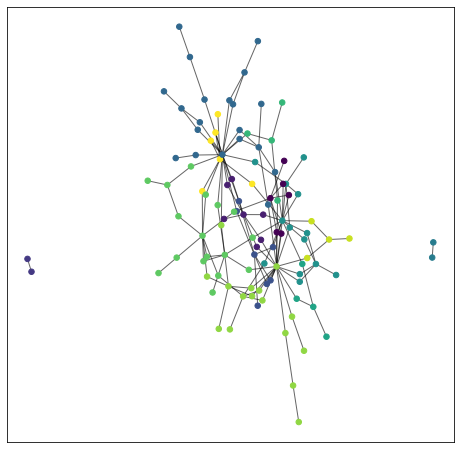

In [67]:
# Remove social media nodes and isolates from the dataset
def remove_unnecessary_data(G):
    H = G.copy()
    for node in H.nodes(data=True):
        if node[1]['label'] == 'SocialMedia':
            G.remove_node(node[0])
    G.remove_nodes_from(list(nx.isolates(G)))
    return G

G = nx.read_gexf('../dataset/graph-small/graph.gexf')
G = G.to_undirected()

# Remove social media nodes and isolates from the dataset
# just to keep it simple 
G = remove_unnecessary_data(G)

#Compute the partition of the graph nodes
communities = community_louvain.best_partition(G) #return as dictionary 

pos = nx.spring_layout(G)

cmap = cm.get_cmap('viridis', max(communities.values()) + 1) #from community_louvain documentation 

plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(G, pos, communities.keys(),
                       cmap=cmap,
                       node_color=list(communities.values()),
                       node_size=30)

nx.draw_networkx_edges(G, pos, alpha=0.6)

plt.show()

## Components

### Weakly & Strongly Connnected Components on nodes dataset

edge list
[['a', 'b'],
 ['a', 'c'],
 ['b', 'c'],
 ['e', 'd'],
 ['f', 'g'],
 ['g', 'c'],
 ['d', 'h'],
 ['h', 'e']]
weak components
[{'b', 'a', 'c', 'f', 'g'}, {'e', 'h', 'd'}]
strong components
[{'c'}, {'b'}, {'a'}, {'h', 'e', 'd'}, {'g'}, {'f'}]
Largest weak component: ['a', 'b', 'c', 'f', 'g']
Largest strong component: ['e', 'h', 'd']


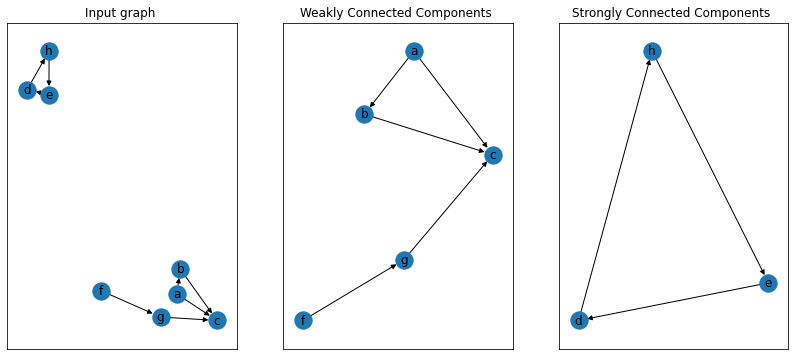

In [12]:
with open('graph-components.txt') as f:
    lines = f.readlines()

edgeList = [line.strip().split() for line in lines]
print("edge list")
pprint(edgeList)

G = nx.DiGraph()
G.add_edges_from(edgeList)

plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 3, 1)
ax.title.set_text("Input graph ")
nx.draw_networkx(G)

weak_components = weakly_connected_components(G) #return sets of weakly connected nodes
strong_components = strongly_connected_components(G) #return sets of strongly connected nodes
print("weak components")
pprint([c for c in weakly_connected_components(G) ])
print("strong components")
pprint([c for c in strongly_connected_components(G) ])

# Make subgraphs the sets of nodes in the components
W = [G.subgraph(c) for c in weakly_connected_components(G)]
S = [G.subgraph(c) for c in strongly_connected_components(G)]

# Get the largest weak & strong components 
weak_component = max(W, key=len) #get largest size of the sets
strong_component = max(S, key=len) #get largest size of the sets
print("Largest weak component:", weak_component.nodes)
print("Largest strong component:", strong_component.nodes)

ax = plt.subplot(1, 3, 2)
ax.title.set_text("Weakly Connected Components ")
pos = nx.spring_layout(weak_component)
nx.draw_networkx(weak_component)

ax = plt.subplot(1, 3, 3)
ax.title.set_text("Strongly Connected Components ")
pos = nx.spring_layout(strong_component)
nx.draw_networkx(strong_component)

plt.show()

## Flows

### Ford-Fulkerson on edges dataset

Flow values that went through each edge:
{'o': {'p': 0, 'q': 3},
 'p': {'r': 2},
 'q': {'r': 1, 't': 2},
 'r': {'t': 3},
 's': {'o': 3, 'p': 2},
 't': {}}
Maximum flow value from source: 5


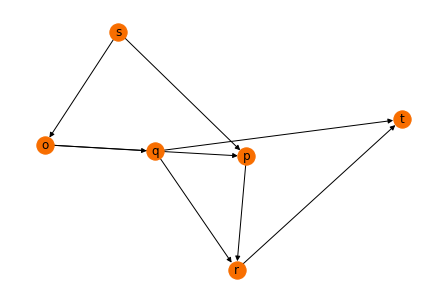

In [13]:
G = nx.read_edgelist('graph-flow.txt', nodetype=str,
                     data=(('capacity', int),), create_using=nx.DiGraph())

flow_value, flow_dict = nx.maximum_flow(G, _s="s", _t="t")

print("Flow values that went through each edge:")
pprint(flow_dict)
print("Maximum flow value from source: " + str(flow_value))

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="#f86e00")

plt.show()

## Clustering

### K-means clustering on karate_club_graph

Edge matrix:
[[1 1 1 ... 1 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 1 0]
 ...
 [1 0 0 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


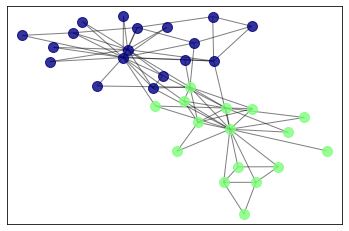

In [14]:
def draw_communities(G, clustering_labels, pos):
    
    # Convert clustering_labels to a dict where key=cluster_id, value=list of nodes in cluster
    cluster_dict = defaultdict(list)
    for node_id, cluster_id in enumerate(clustering_labels):
        cluster_dict[cluster_id].append(node_id)

    # Normalize number of clusters for choosing a color
    norm = colors.Normalize(vmin=0, vmax=len(cluster_dict.keys()))

    for club, members in cluster_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=members,
                               node_color=cm.jet(norm(club)),
                               node_size=100,
                               alpha=0.8)
        
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()
    
def graph_to_edge_matrix(G):
    # Initialize edge matrix with zeros
    edge_matrix = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_matrix[int(node)][int(neighbor)] = 1 #put a 1 for the neighbors 
        edge_matrix[int(node)][int(node)] = 1 #put a 1 for itself (diagonal 1's)

    return edge_matrix

G = nx.karate_club_graph()

# Convert a networkx graph into an edge matrix
edge_matrix = graph_to_edge_matrix(G)
print("Edge matrix:")
print(edge_matrix)

# K-means clustering - this one is not very suited for membank dataset
model = cluster.KMeans(n_clusters=2, n_init=1000)
model.fit(edge_matrix)
clustering_labels = list(model.labels_) #0s and 1s (two clusters)

# Draw the nodes to a plot with assigned colors for each individual cluster
draw_communities(G, clustering_labels, pos = nx.spring_layout(G))

## Coloring

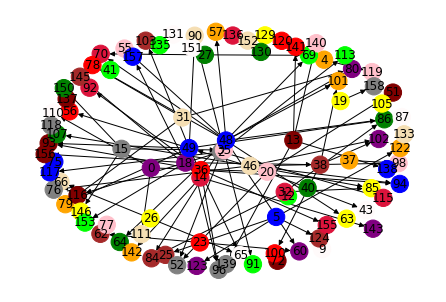

In [81]:
def sample_graph(G, number_of_samples, seed):
    random.seed(seed)
    H = G.copy()
    samples = random.sample(list(G.nodes()), number_of_samples)
    for n in G:
        if n not in samples:
            H.remove_node(n)
    return H


colors = [
    "blue", "gray", "pink",
    "red", "orange", "purple",
    "brown", "yellow", "green",
    "snow", "wheat", "lime",
    "crimson", "maroon",]

G = nx.read_gexf('../dataset/graph-small/graph.gexf')

# Select defined number of random nodes from a graph
# because the complete one is too big to visualize properly
G = sample_graph(G, 100, 0)
#return dict - keys:nodes , values:corrersponding colors
d = nx.coloring.equitable_color(G, num_colors=14) 

node_colors = []
for i in d.keys():
    node_colors.append(colors[d[i]])

nx.draw(G, node_color=node_colors, with_labels=True)
plt.show()

In [82]:
G.nodes

NodeView(('0', '20', '2', '23', '4', '5', '25', '26', '27', '9', '31', '12', '32', '13', '14', '15', '35', '36', '37', '18', '38', '19', '40', '43', '46', '41', '48', '49', '51', '52', '55', '56', '57', '60', '62', '63', '64', '65', '66', '69', '70', '72', '75', '76', '77', '78', '79', '80', '84', '85', '86', '87', '90', '91', '92', '93', '94', '96', '98', '100', '101', '102', '103', '105', '107', '110', '111', '113', '115', '116', '117', '118', '119', '120', '122', '123', '124', '129', '130', '131', '133', '135', '136', '137', '138', '139', '140', '141', '142', '143', '145', '146', '150', '151', '152', '153', '155', '156', '157', '158'))